## Lấy về thư viện vnstock

In [1]:
!pip install -U vnstock


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
## Có thể gọi các class chi tiết trong thư viện thay vì sử dụng cấp cao nhất là Vnstock
from vnstock import Vnstock
from vnstock import Listing, Quote, Company, Finance, Trading, Screener

## Tạo list các cổ phiếu VN30

In [3]:
# Tạo danh sách các mã cổ phiếu VN30 (cập nhật tháng 11/2025)
vn30_list = [
    # Ngân hàng (13 mã)
    'ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB',
    # Bảo hiểm (1 mã)
    'BVH',
    # Công nghệ - Thông tin (1 mã)
    'FPT',
    # Năng lượng (3 mã)
    'GAS', 'PLX', 'POW',
    # Tập đoàn đa ngành (6 mã)
    'GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM',
    # Bán lẻ - Công nghệ (1 mã)
    'MWG',
    # Hàng tiêu dùng - Thực phẩm (1 mã)
    'MSN',
    # Thép - Công nghiệp (1 mã)
    'HPG',
    # Bất động sản (2 mã)
    'BCM', 'VRE',
    # Chứng khoán (1 mã)
    'SSI'
]

print(f"✓ Đã tạo danh sách VN30 với {len(vn30_list)} mã cổ phiếu")
print(f"Danh sách: {sorted(vn30_list)}")

✓ Đã tạo danh sách VN30 với 30 mã cổ phiếu
Danh sách: ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'PLX', 'POW', 'SAB', 'SHB', 'SSB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']


## Phân loại VN30 theo ngành nghề

In [4]:
# Phân loại các mã VN30 theo ngành nghề
import pandas as pd

# Dictionary phân loại ngành (cập nhật 11/2025)
vn30_sectors_dict = {
    'Ngân hàng': ['ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB'],
    'Bảo hiểm': ['BVH'],
    'Công nghệ - Thông tin': ['FPT'],
    'Năng lượng': ['GAS', 'PLX', 'POW'],
    'Tập đoàn đa ngành': ['GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM'],
    'Bán lẻ - Công nghệ': ['MWG'],
    'Hàng tiêu dùng - Thực phẩm': ['MSN'],
    'Thép - Công nghiệp': ['HPG'],
    'Bất động sản': ['BCM', 'VRE'],
    'Chứng khoán': ['SSI']
}

# Tạo DataFrame từ dictionary
sector_data = []
for sector, symbols in vn30_sectors_dict.items():
    for symbol in symbols:
        sector_data.append({'symbol': symbol, 'sector': sector})

df_sectors = pd.DataFrame(sector_data)

# Kiểm tra tổng số mã
print("Phân loại ngành cho VN30:")
print(df_sectors.groupby('sector')['symbol'].apply(list))
print(f"\nTổng số mã: {len(df_sectors)}")
print(f"\nCác ngành:")
for sector, count in df_sectors['sector'].value_counts().items():
    print(f"  • {sector}: {count} mã")

df_sectors.head()

Phân loại ngành cho VN30:
sector
Bán lẻ - Công nghệ                                                        [MWG]
Bảo hiểm                                                                  [BVH]
Bất động sản                                                         [BCM, VRE]
Chứng khoán                                                               [SSI]
Công nghệ - Thông tin                                                     [FPT]
Hàng tiêu dùng - Thực phẩm                                                [MSN]
Ngân hàng                     [ACB, BID, CTG, HDB, MBB, SHB, SSB, STB, TCB, ...
Năng lượng                                                      [GAS, PLX, POW]
Thép - Công nghiệp                                                        [HPG]
Tập đoàn đa ngành                                [GVR, SAB, VIC, VJC, VNM, VHM]
Name: symbol, dtype: object

Tổng số mã: 30

Các ngành:
  • Ngân hàng: 13 mã
  • Tập đoàn đa ngành: 6 mã
  • Năng lượng: 3 mã
  • Bất động sản: 2 mã
  • Bảo hiểm: 1 mã

,symbol,sector
0,ACB,Ngân hàng
1,BID,Ngân hàng
2,CTG,Ngân hàng
3,HDB,Ngân hàng
4,MBB,Ngân hàng


## Ngày chọn để lấy dữ liệu

In [14]:
start = "2015-01-01"
end = "2024-12-31"

In [15]:
# Lấy dữ liệu OHLCV của VN30
import pandas as pd
from vnstock import Vnstock

print("="*80)
print("LẤY DỮ LIỆU OHLCV CHO VN30")
print("="*80)
print(f"📅 Khoảng thời gian: {start} đến {end}")
print(f"📊 Số mã cổ phiếu: {len(vn30_list)}")
print(f"📈 Dữ liệu: Open, High, Low, Close, Volume")
print("-"*80)

# Lấy dữ liệu cho từng mã
all_data = []
success_count = 0
failed_symbols = []

for i, symbol in enumerate(vn30_list, 1):
    try:
        print(f"[{i:2d}/{len(vn30_list)}] Đang lấy {symbol}...", end=' ')
        
        stock = Vnstock().stock(symbol=symbol, source='VCI')
        df = stock.quote.history(start=start, end=end)
        
        if df is not None and not df.empty:
            # Reset index để chuyển time/date thành cột
            df = df.reset_index()
            
            # Chuẩn hóa tên cột nếu cần
            if 'time' in df.columns:
                df = df.rename(columns={'time': 'date'})
            
            # Chọn các cột OHLCV + date
            ohlcv_cols = ['date', 'open', 'high', 'low', 'close', 'volume']
            df = df[[col for col in ohlcv_cols if col in df.columns]]
            
            # Thêm cột symbol
            df['symbol'] = symbol
            
            all_data.append(df)
            success_count += 1
            print(f"✓ ({len(df):,} ngày)")
        else:
            failed_symbols.append(symbol)
            print(f"✗ Không có dữ liệu")
            
    except Exception as e:
        failed_symbols.append(symbol)
        print(f"✗ Lỗi: {str(e)[:50]}")

# Gộp tất cả dữ liệu
if all_data:
    vn30_ohlcv = pd.concat(all_data, ignore_index=True)
    
    # Chuyển đổi date sang datetime
    vn30_ohlcv['date'] = pd.to_datetime(vn30_ohlcv['date'])
    
    # Sắp xếp theo symbol và date
    vn30_ohlcv = vn30_ohlcv.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print("\n" + "="*80)
    print("KẾT QUẢ")
    print("="*80)
    print(f"✅ Số mã lấy thành công: {success_count}/{len(vn30_list)}")
    print(f"✅ Tổng số dòng dữ liệu: {len(vn30_ohlcv):,}")
    
    if failed_symbols:
        print(f"⚠️  Các mã thất bại ({len(failed_symbols)}): {', '.join(failed_symbols)}")
    
    # Thống kê chi tiết
    print(f"\n📋 Các cột dữ liệu:")
    for col in vn30_ohlcv.columns:
        print(f"   • {col}")
    
    print(f"\n📊 Thống kê:")
    print(f"   • Số mã: {vn30_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {vn30_ohlcv['date'].min().date()} đến {vn30_ohlcv['date'].max().date()}")
    print(f"   • Trung bình ngày/mã: {len(vn30_ohlcv) / vn30_ohlcv['symbol'].nunique():.0f}")
    
    # Thống kê theo từng mã
    print(f"\n📈 Số ngày giao dịch theo từng mã:")
    symbol_counts = vn30_ohlcv['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts.items():
        print(f"   {symbol}: {count:,} ngày")
    
    # Hiển thị mẫu dữ liệu
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng đầu):")
    display(vn30_ohlcv.head(10))
    
    print(f"\n💾 Dữ liệu đã lưu vào biến: vn30_ohlcv")
    print(f"   Shape: {vn30_ohlcv.shape} (rows, columns)")
    
else:
    print("\n❌ Không lấy được dữ liệu nào!")
    vn30_ohlcv = pd.DataFrame()

LẤY DỮ LIỆU OHLCV CHO VN30
📅 Khoảng thời gian: 2015-01-01 đến 2024-12-31
📊 Số mã cổ phiếu: 30
📈 Dữ liệu: Open, High, Low, Close, Volume
--------------------------------------------------------------------------------
[ 1/30] Đang lấy ACB... ✓ (2,611 ngày)
[ 2/30] Đang lấy BID... ✓ (2,611 ngày)
[ 2/30] Đang lấy BID... ✓ (2,611 ngày)
[ 3/30] Đang lấy CTG... ✓ (2,611 ngày)
[ 3/30] Đang lấy CTG... ✓ (2,611 ngày)
[ 4/30] Đang lấy HDB... ✓ (2,611 ngày)
[ 4/30] Đang lấy HDB... ✓ (1,747 ngày)
[ 5/30] Đang lấy MBB... ✓ (1,747 ngày)
[ 5/30] Đang lấy MBB... ✓ (2,611 ngày)
[ 6/30] Đang lấy SHB... ✓ (2,611 ngày)
[ 6/30] Đang lấy SHB... ✓ (2,611 ngày)
[ 7/30] Đang lấy SSB... ✓ (2,611 ngày)
[ 7/30] Đang lấy SSB... ✓ (946 ngày)
[ 8/30] Đang lấy STB... ✓ (946 ngày)
[ 8/30] Đang lấy STB... ✓ (2,611 ngày)
[ 9/30] Đang lấy TCB... ✓ (2,611 ngày)
[ 9/30] Đang lấy TCB... ✓ (1,649 ngày)
[10/30] Đang lấy TPB... ✓ (1,649 ngày)
[10/30] Đang lấy TPB... ✓ (1,678 ngày)
[11/30] Đang lấy VCB... ✓ (1,678 ngày)
[11/30]

,date,open,high,low,close,volume,symbol
0,2014-07-18,2.37,2.37,2.35,2.37,105955,ACB
1,2014-07-21,2.37,2.37,2.35,2.35,59866,ACB
2,2014-07-22,2.35,2.37,2.34,2.35,221300,ACB
3,2014-07-23,2.35,2.37,2.35,2.35,46739,ACB
4,2014-07-24,2.35,2.37,2.35,2.35,57626,ACB
5,2014-07-25,2.35,2.37,2.34,2.34,103276,ACB
6,2014-07-28,2.35,2.37,2.34,2.34,110575,ACB
7,2014-07-29,2.35,2.35,2.34,2.35,94417,ACB
8,2014-07-30,2.35,2.35,2.34,2.35,9200,ACB
9,2014-07-31,2.34,2.35,2.34,2.35,110496,ACB



💾 Dữ liệu đã lưu vào biến: vn30_ohlcv
   Shape: (67050, 7) (rows, columns)


In [16]:
# Lọc dữ liệu OHLCV cho 10 mã cổ phiếu đã chọn từ vn30_ohlcv
import pandas as pd

# Danh sách 10 mã cổ phiếu
selected_symbols = ['ACB', 'BCM', 'BVH', 'FPT', 'GAS', 'GVR', 'HPG', 'MSN', 'MWG', 'SSI']

print("="*80)
print("LỌC DỮ LIỆU OHLCV CHO 10 MÃ CỔ PHIẾU TỪ VN30_OHLCV")
print("="*80)
print(f"📋 Danh sách: {selected_symbols}")
print(f"📊 Số mã cổ phiếu: {len(selected_symbols)}")
print("-"*80)

if 'vn30_ohlcv' not in globals() or vn30_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu vn30_ohlcv. Vui lòng chạy cell lấy dữ liệu VN30 trước!")
    selected_ohlcv = pd.DataFrame()
else:
    # Lọc dữ liệu cho 10 mã đã chọn
    selected_ohlcv = vn30_ohlcv[vn30_ohlcv['symbol'].isin(selected_symbols)].copy()
    
    # Sắp xếp theo symbol và date
    selected_ohlcv = selected_ohlcv.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print("\n" + "="*80)
    print("KẾT QUẢ")
    print("="*80)
    print(f"✅ Tổng số dòng dữ liệu: {len(selected_ohlcv):,}")
    print(f"✅ Số mã trong DataFrame: {selected_ohlcv['symbol'].nunique()}")
    
    # Kiểm tra mã nào có/không có
    found_symbols = selected_ohlcv['symbol'].unique().tolist()
    missing_symbols = [s for s in selected_symbols if s not in found_symbols]
    
    if missing_symbols:
        print(f"⚠️  Các mã không có dữ liệu ({len(missing_symbols)}): {', '.join(missing_symbols)}")
    
    # Thống kê chi tiết
    print(f"\n📋 Các cột dữ liệu:")
    for col in selected_ohlcv.columns:
        print(f"   • {col}")
    
    print(f"\n📊 Thống kê:")
    print(f"   • Số mã: {selected_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {selected_ohlcv['date'].min().date()} đến {selected_ohlcv['date'].max().date()}")
    print(f"   • Trung bình ngày/mã: {len(selected_ohlcv) / selected_ohlcv['symbol'].nunique():.0f}")
    
    # Thống kê theo từng mã
    print(f"\n📈 Số ngày giao dịch theo từng mã:")
    symbol_counts_selected = selected_ohlcv['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts_selected.items():
        print(f"   {symbol}: {count:,} ngày")
    
    # Hiển thị mẫu dữ liệu
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng đầu):")
    display(selected_ohlcv.head(10))
    
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng cuối):")
    display(selected_ohlcv.tail(10))
    
    print(f"\n💾 Dữ liệu đã lưu vào biến: selected_ohlcv")
    print(f"   Shape: {selected_ohlcv.shape} (rows, columns)")
    print(f"   Memory usage: {selected_ohlcv.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n✅ HOÀN TẤT!")

LỌC DỮ LIỆU OHLCV CHO 10 MÃ CỔ PHIẾU TỪ VN30_OHLCV
📋 Danh sách: ['ACB', 'BCM', 'BVH', 'FPT', 'GAS', 'GVR', 'HPG', 'MSN', 'MWG', 'SSI']
📊 Số mã cổ phiếu: 10
--------------------------------------------------------------------------------

KẾT QUẢ
✅ Tổng số dòng dữ liệu: 24,293
✅ Số mã trong DataFrame: 10

📋 Các cột dữ liệu:
   • date
   • open
   • high
   • low
   • close
   • volume
   • symbol

📊 Thống kê:
   • Số mã: 10
   • Khoảng thời gian: 2014-07-18 đến 2024-12-31
   • Trung bình ngày/mã: 2429

📈 Số ngày giao dịch theo từng mã:
   ACB: 2,611 ngày
   BCM: 1,712 ngày
   BVH: 2,611 ngày
   FPT: 2,611 ngày
   GAS: 2,611 ngày
   GVR: 1,693 ngày
   HPG: 2,611 ngày
   MSN: 2,611 ngày
   MWG: 2,611 ngày
   SSI: 2,611 ngày

📄 Mẫu dữ liệu OHLCV (10 dòng đầu):


,date,open,high,low,close,volume,symbol
0,2014-07-18,2.37,2.37,2.35,2.37,105955,ACB
1,2014-07-21,2.37,2.37,2.35,2.35,59866,ACB
2,2014-07-22,2.35,2.37,2.34,2.35,221300,ACB
3,2014-07-23,2.35,2.37,2.35,2.35,46739,ACB
4,2014-07-24,2.35,2.37,2.35,2.35,57626,ACB
5,2014-07-25,2.35,2.37,2.34,2.34,103276,ACB
6,2014-07-28,2.35,2.37,2.34,2.34,110575,ACB
7,2014-07-29,2.35,2.35,2.34,2.35,94417,ACB
8,2014-07-30,2.35,2.35,2.34,2.35,9200,ACB
9,2014-07-31,2.34,2.35,2.34,2.35,110496,ACB



📄 Mẫu dữ liệu OHLCV (10 dòng cuối):


,date,open,high,low,close,volume,symbol
24283,2024-12-18,25.36,25.55,25.16,25.55,7208100,SSI
24284,2024-12-19,25.16,25.55,24.82,25.55,30722013,SSI
24285,2024-12-20,25.45,25.60,25.26,25.60,12292019,SSI
24286,2024-12-23,25.55,25.65,25.21,25.21,7847711,SSI
24287,2024-12-24,25.21,25.31,24.87,25.31,12305704,SSI
24288,2024-12-25,25.36,26.09,25.26,25.89,26237763,SSI
24289,2024-12-26,25.84,25.94,25.70,25.70,8770905,SSI
24290,2024-12-27,25.75,26.04,25.65,25.94,16356516,SSI
24291,2024-12-30,25.94,26.23,25.79,25.79,11501673,SSI
24292,2024-12-31,25.79,25.79,25.40,25.40,8238165,SSI



💾 Dữ liệu đã lưu vào biến: selected_ohlcv
   Shape: (24293, 7) (rows, columns)
   Memory usage: 2.50 MB

✅ HOÀN TẤT!


# Triển khai bài báo 

In [17]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset


### Cổ phiếu thực hiện: FPT
### Dữ liệu lấy toàn bộ từ đầu 2015 đến hết năm 2020

In [18]:
# Tạo biến price_history cho mã FPT từ 2015 đến hết năm 2020
import pandas as pd

print("="*80)
print("TẠO BIẾN PRICE_HISTORY CHO MÃ FPT (2015-2020)")
print("="*80)

if 'selected_ohlcv' not in globals() or selected_ohlcv.empty:
    print("⚠️  Chưa có dữ liệu selected_ohlcv. Vui lòng chạy cell lọc dữ liệu trước!")
else:
    # Lọc dữ liệu FPT
    fpt_data = selected_ohlcv[selected_ohlcv['symbol'] == 'FPT'].copy()
    
    if fpt_data.empty:
        print("⚠️  Không tìm thấy dữ liệu FPT trong selected_ohlcv!")
    else:
        # Đảm bảo cột date là datetime
        fpt_data['date'] = pd.to_datetime(fpt_data['date'])
        
        # Lọc từ 2015-01-01 đến 2020-12-31
        start_date = pd.Timestamp('2015-01-01')
        end_date = pd.Timestamp('2020-12-31')
        
        price_history = fpt_data[
            (fpt_data['date'] >= start_date) & 
            (fpt_data['date'] <= end_date)
        ].copy()
        
        # Sắp xếp theo ngày
        price_history = price_history.sort_values('date').reset_index(drop=True)
                
        # Hiển thị mẫu dữ liệu
        print(f"\n📄 Mẫu dữ liệu price_history (10 dòng đầu):")
        display(price_history.head(10))
        
        print(f"\n📄 Mẫu dữ liệu price_history (10 dòng cuối):")
        display(price_history.tail(10))

TẠO BIẾN PRICE_HISTORY CHO MÃ FPT (2015-2020)

📄 Mẫu dữ liệu price_history (10 dòng đầu):


,date,open,high,low,close,volume,symbol
0,2015-01-05,7.34,7.37,7.28,7.31,273550,FPT
1,2015-01-06,7.27,7.36,7.24,7.36,364050,FPT
2,2015-01-07,7.36,7.51,7.36,7.40,405560,FPT
3,2015-01-08,7.39,7.40,7.31,7.33,227300,FPT
4,2015-01-09,7.33,7.42,7.33,7.39,320210,FPT
5,2015-01-12,7.39,7.53,7.39,7.43,679050,FPT
6,2015-01-13,7.40,7.47,7.40,7.45,242060,FPT
7,2015-01-14,7.45,7.48,7.37,7.43,421120,FPT
8,2015-01-15,7.47,7.47,7.40,7.45,281910,FPT
9,2015-01-16,7.47,7.47,7.40,7.42,174340,FPT



📄 Mẫu dữ liệu price_history (10 dòng cuối):


,date,open,high,low,close,volume,symbol
1491,2020-12-18,24.68,24.94,24.68,24.85,1532820,FPT
1492,2020-12-21,25.03,25.25,24.94,25.12,2307390,FPT
1493,2020-12-22,25.07,25.55,24.94,25.38,2576390,FPT
1494,2020-12-23,25.46,25.60,24.98,25.12,1391420,FPT
1495,2020-12-24,25.12,25.25,24.63,24.90,2386210,FPT
1496,2020-12-25,24.90,25.16,24.72,25.16,1625110,FPT
1497,2020-12-28,25.29,25.60,25.12,25.29,2197090,FPT
1498,2020-12-29,25.29,25.68,25.16,25.60,2172950,FPT
1499,2020-12-30,25.73,25.73,25.38,25.38,1204180,FPT
1500,2020-12-31,25.38,25.86,25.33,25.81,2036370,FPT


### Xây dựng một Feature Extraction AutoEncoder (FCAE) để lọc dữ liệu nhiễu từ dữ liệu đã lấy được ở trên

100%|██████████| 100/100 [00:05<00:00, 18.69it/s]


Last Loss 0.10902812331914902


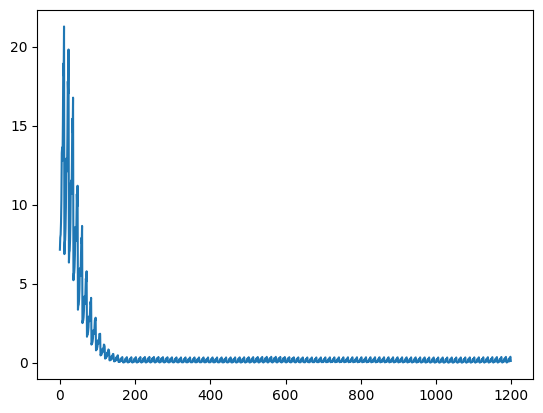

In [20]:
past_days = 32

class FCAE(nn.Module):
    def __init__(self, input_size=past_days):
        super().__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )
        self.dec = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_size)
        )

    def forward(self, x):
        enc = self.enc(x)
        return enc, self.dec(enc)

class FeaturesDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

samples = list()
for r in price_history.rolling(past_days):
    sample = r.values[:, 3]
    if len(sample) < past_days:
        continue
    samples.append(np.array(sample).flatten().tolist())
samples = np.array(samples).astype(np.float32)

fcae = FCAE()
optimizer = optim.Adam(
    fcae.parameters(),
    lr=1e-3
)
loss_func = nn.HuberLoss()

datasetf = FeaturesDataset(samples)
dataloaderf = DataLoader(datasetf, batch_size=128, shuffle=False)

losses = list()
for epo in tqdm(range(100)):
    for sample in dataloaderf:
        enc, out = fcae(sample)
        loss = loss_func(out, sample)
        
        fcae.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.detach().item())

print('Last Loss', losses[-1])
plt.plot(losses)
plt.show()

In [ ]:
sample = torch.Tensor(samples[np.random.choice(np.arange(len(samples)), 1)])

### Kết quả xem thử mô hình lấy đặc trưng và lấy dữ liệu

In [21]:
features = list()
for r in price_history.rolling(past_days):
    if len(r) < past_days:
        features.append([np.nan for i in range(8)])
        continue
    with torch.no_grad():
        enc, out = fcae(torch.Tensor([r.values[:, 3]]))
        features.append(enc.squeeze().numpy().tolist())
features = np.array(features)

for i in range(8):
    price_history[i] = features[:, i]
price_history.head(40)

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)


,date,open,high,low,close,volume,symbol,0,1,2,3,4,5,6,7
0,2015-01-05,7.34,7.37,7.28,7.31,273550,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06,7.27,7.36,7.24,7.36,364050,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07,7.36,7.51,7.36,7.40,405560,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08,7.39,7.40,7.31,7.33,227300,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09,7.33,7.42,7.33,7.39,320210,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-12,7.39,7.53,7.39,7.43,679050,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-13,7.40,7.47,7.40,7.45,242060,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-14,7.45,7.48,7.37,7.43,421120,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-15,7.47,7.47,7.40,7.45,281910,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-01-16,7.47,7.47,7.40,7.42,174340,FPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Gắn các chỉ báo kĩ thuật của bài báo yêu cầu

In [ ]:
# Technical Indicators using ta library
try:
    import ta
except ImportError:
    print("Installing ta library...")
    !pip install ta
    import ta

print(f"Số dòng ban đầu: {len(price_history)}")

# Tính các chỉ số kỹ thuật trực tiếp trên price_history
# MACD (12, 26, 9)
price_history['macd'] = ta.trend.macd_diff(price_history['close'], window_slow=26, window_fast=12, window_sign=9)

# RSI (14)
price_history['rsi'] = ta.momentum.rsi(price_history['close'], window=14)

# CCI (20)
price_history['cci'] = ta.trend.cci(price_history['high'], price_history['low'], price_history['close'], window=20)

# ADX (14)
price_history['adx'] = ta.trend.adx(price_history['high'], price_history['low'], price_history['close'], window=14)

# Loại bỏ các cột autoencoder features (0-7) nếu có
columns_to_drop = [col for col in price_history.columns if isinstance(col, int)]
if columns_to_drop:
    price_history = price_history.drop(columns=columns_to_drop)
    print(f"Đã xóa {len(columns_to_drop)} cột features: {columns_to_drop}")

# Loại bỏ NaN (các dòng đầu do tính toán chỉ số kỹ thuật)
price_history = price_history.dropna()

print(f"Số dòng sau khi loại NaN: {len(price_history)}")
print(f"Các cột cuối cùng: {list(price_history.columns)}")
print(f"Shape cuối cùng: {price_history.shape}")

# Hiển thị kết quả
price_history.head(100)

Số dòng ban đầu: 1501
Đã xóa 8 cột features: [0, 1, 2, 3, 4, 5, 6, 7]
Số dòng sau khi loại NaN: 1468
Các cột cuối cùng: ['date', 'open', 'high', 'low', 'close', 'volume', 'symbol', 'macd', 'rsi', 'cci', 'adx']
Shape cuối cùng: (1468, 11)


,date,open,high,low,close,volume,symbol,macd,rsi,cci,adx
33,2015-02-27,7.51,7.54,7.45,7.47,314940,FPT,0.031398,64.308454,138.882929,19.667464
34,2015-03-02,7.50,7.50,7.40,7.42,471270,FPT,0.027010,57.945825,95.558830,20.083270
35,2015-03-03,7.47,7.48,7.43,7.48,214540,FPT,0.026660,62.713300,110.020450,20.469375
36,2015-03-04,7.53,7.73,7.53,7.65,993500,FPT,0.035820,72.296265,203.947368,22.709780
37,2015-03-05,7.73,7.80,7.65,7.65,393540,FPT,0.039529,72.296265,192.634561,25.121627
...,...,...,...,...,...,...,...,...,...,...,...
128,2015-07-16,8.29,8.32,8.21,8.32,611060,FPT,-0.023141,54.213312,-27.300749,37.261311
129,2015-07-17,8.30,8.41,8.29,8.32,315540,FPT,-0.026414,54.213312,-3.633380,36.623390
130,2015-07-20,8.32,8.32,8.23,8.29,419830,FPT,-0.030004,52.035473,-55.171531,35.452863
131,2015-07-21,8.25,8.27,8.14,8.18,876450,FPT,-0.038641,44.911339,-122.875817,33.571799


length 1468


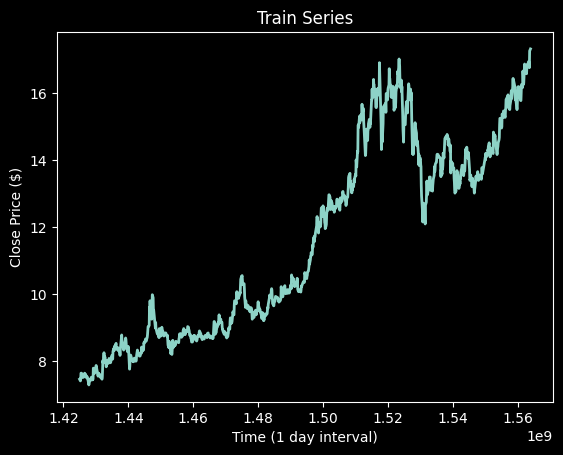

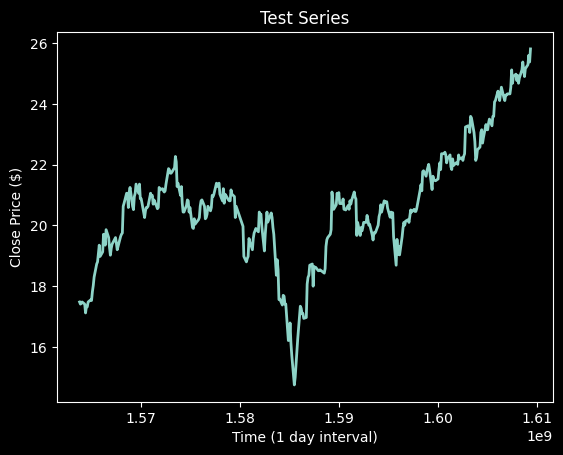

In [ ]:
# Import pendulum for timestamp conversion
try:
    import pendulum
except ImportError:
    print("Installing pendulum...")
    !pip install pendulum
    import pendulum

# time_series = list(price_history['close'])
time_series = price_history
print('length', len(time_series))

# Sử dụng cột 'date' thay vì index để tránh lỗi parse
if 'date' in price_history.columns:
    dt_list = [pendulum.parse(str(dt)).float_timestamp for dt in price_history['date']]
else:
    # Nếu không có cột date, tạo index đơn giản
    dt_list = list(range(len(price_history)))

# split into train, val, test
train_portion = 0.75 # 0.8 for 10 years, 0.75 for 8 years
train_ind = int(len(time_series) * train_portion)
# val_ind = train_ind + int(len(time_series) * 0.25)

train_series = time_series[:train_ind]
# val_series = time_series[train_ind:val_ind]
test_series = time_series[train_ind:]

time_int = [
    (0, train_ind), 
#     (train_ind, val_ind), 
    (train_ind, len(time_series))
]
titles = [
    'Train Series', 
#     'Validation Series', 
    'Test Series'
]

# plot
i=0
for series in [train_series, test_series]:
    plt.style.use('dark_background')
    dt_list_c = dt_list[time_int[i][0]:time_int[i][1]]
    plt.plot(dt_list_c, series['close'], linewidth=2)
    plt.title(titles[i])
    plt.xlabel('Time (1 day interval)')
    plt.ylabel('Close Price ($)')
    i += 1
    plt.show()

In [ ]:
# Risk/Investment Management
balance_init = 1000 # initial balance in hand
k = 5 # max number of shares
min_balance = -100 # tolerance balance

# action
A = [a for a in range(-k, k+1, 1)]

# transition
def get_features(s, new_record):
    """
    Extract technical indicator features from a record
    Returns: [macd, rsi, cci, adx]
    """
    # Columns: date(0), open(1), high(2), low(3), close(4), volume(5), symbol(6), macd(7), rsi(8), cci(9), adx(10)
    return [
        float(new_record['macd']),
        float(new_record['rsi']),
        float(new_record['cci']),
        float(new_record['adx'])
    ]

def update_state(s, a, new_record):
    # s: (price, balance, shares)
    price, balance, shares = s[0], s[1], s[2]
    # a: (0 is hold, -k is sell, +k is buying)
    
    # Constraints
    # if is sell, check if there are enough number of shares
    if a < 0:
        if shares <= abs(a):
            a = -shares
    elif a > 0: # if buying, check if there are enough balance
        if balance - (a * price) < min_balance:
            possible_balance = np.array([balance - (a_ * price) for a_ in range(a)]) >= min_balance
            a = np.argmax(possible_balance)
    new_shares = shares + a
    new_balance = balance - (a * price)
    
    # apply fee (approx 0.1%)
    new_balance -= (a * price) * 1e-3
    
    # update state: [price, balance, shares, macd, rsi, cci, adx]
    features = get_features(s, new_record)
    return [float(new_record['close']), float(new_balance), float(new_shares)] + features

# reward
def reward(s, s_next):
    return (s[1] + s[0]*s[2]) - (s_next[1] + s_next[0]*s_next[2])

# interact
def simulate(series, state_init, pi, greedy, eps=0.2):
    Rs = list()
    actions = list()
    states = [state_init]
    for index, row in series.iterrows():
        a = pi(states[-1], greedy=greedy, eps=eps)
        actions.append(a)
        states.append(update_state(states[-1], a, row))
        Rs.append(reward(states[-2], states[-1]))
    return states, Rs, actions

def interact_test(pi, series_name='test', verbose=True):
    if series_name == 'test':
        series = test_series
        prev_series = train_series
        prev_ind = -1
    elif series_name == 'train':
        series = train_series[1:]
        prev_series = train_series
        prev_ind = 0

    # Initialize state: [price, balance, shares, macd, rsi, cci, adx]
    prev_row = prev_series.iloc[prev_ind]
    state_init = [
        float(prev_row['close']), 
        balance_init, 
        0,
        float(prev_row['macd']),
        float(prev_row['rsi']),
        float(prev_row['cci']),
        float(prev_row['adx'])
    ]

    # start a trajectory
    states, rewards, actions = simulate(series, state_init, pi, True)

    # verbose
    portforlio = np.array([s[1] + s[0]*s[2] for s in states])
    if verbose:
        print("Profit at The End of Trajactory:", portforlio[-1] - balance_init)

        plt.style.use('dark_background')
        plt.plot(series['close'])
        plt.title("Price")
        plt.xlabel("Time (1 day inter val)")
        plt.ylabel("Price ($)")
        plt.show()

        plt.style.use('dark_background')
        plt.plot([s[2] for s in states])
        plt.title("Number of Shares")
        plt.xlabel("Time (1 day interval)")
        plt.ylabel("Num shares")
        plt.show()

        plt.style.use('dark_background')
        plt.plot(portforlio)
        plt.title("Portfolio ($)")
        plt.xlabel("Time (1 day inter val)")
        plt.ylabel("Portfolio ($)")
        plt.show()

        plt.style.use('dark_background')
        plt.plot(portforlio - balance_init)
        plt.title("Trading Profit")
        plt.xlabel("Time (1 day interval)")
        plt.ylabel("Profit ($)")
        plt.show()
    
    return portforlio[-1] - balance_init

In [ ]:
# policy
def pi_random(s, greedy=False, eps=0.2):
    return np.random.choice(A) # random policy (uniform distributed)

profits = list()
for rep in tqdm(range(20)):
    profits.append(interact_test(pi_random, series_name='test', verbose=False))
print("Avg Profit", np.mean(profits))
print('STD Profit', np.std(profits))

100%|██████████| 20/20 [00:01<00:00, 17.36it/s]

Avg Profit 160.9547330000001
STD Profit 87.96129465730978


Profit at The End of Trajactory: 1420.0597500000003


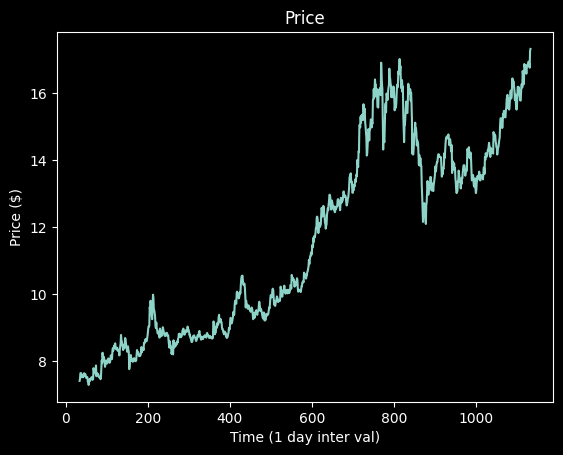

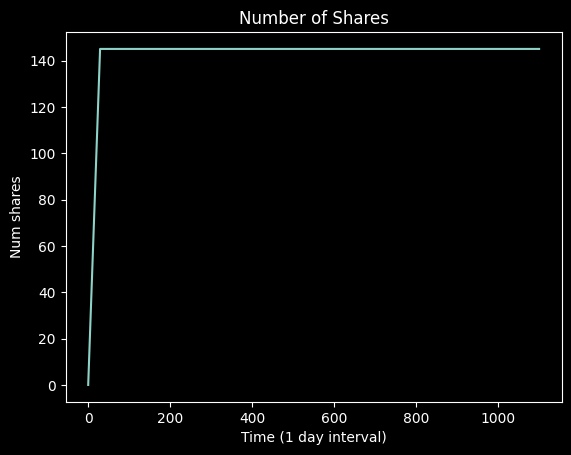

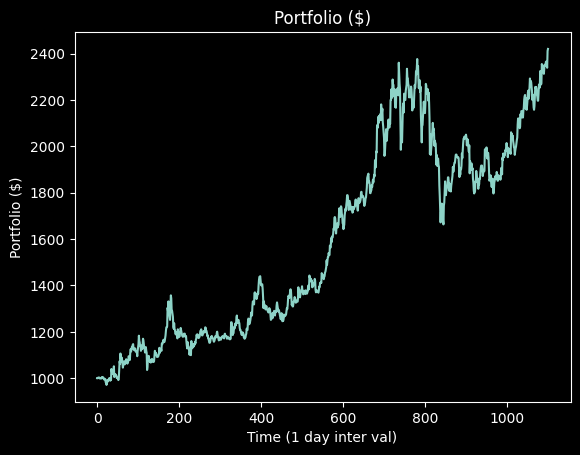

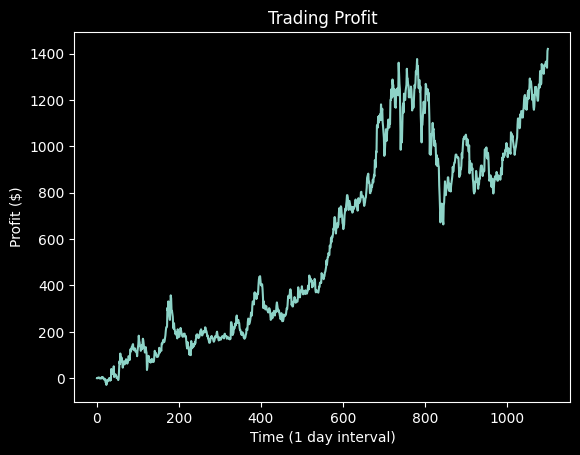

Profit at The End of Trajactory: 503.2056500000001


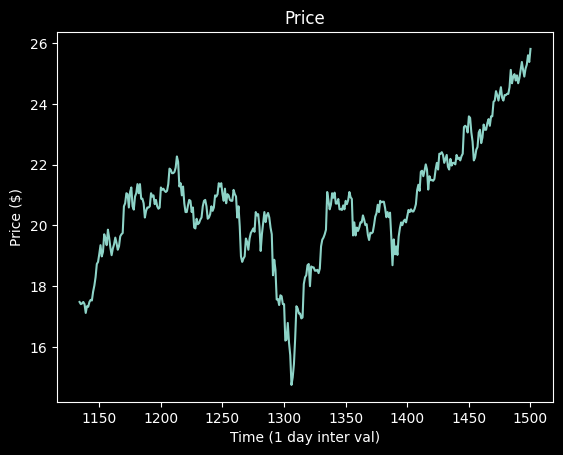

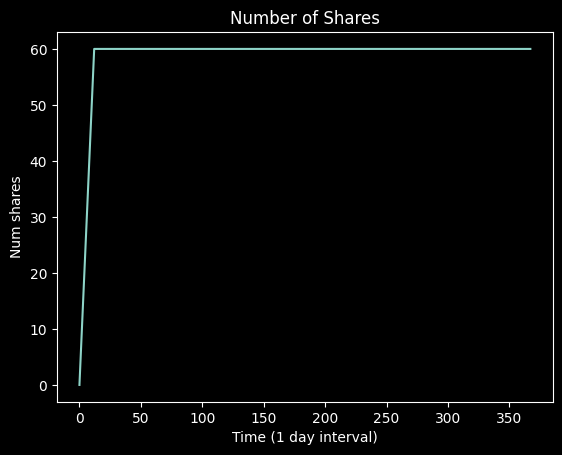

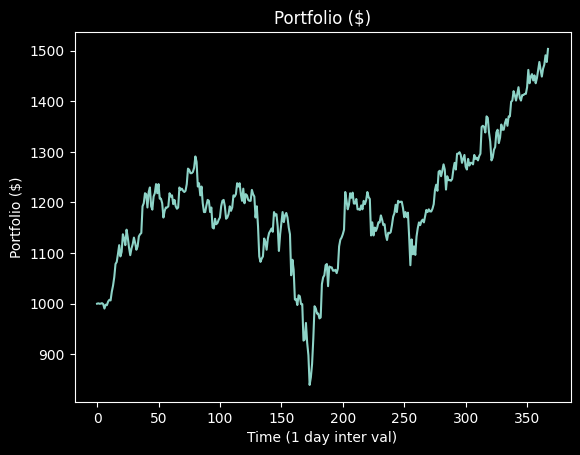

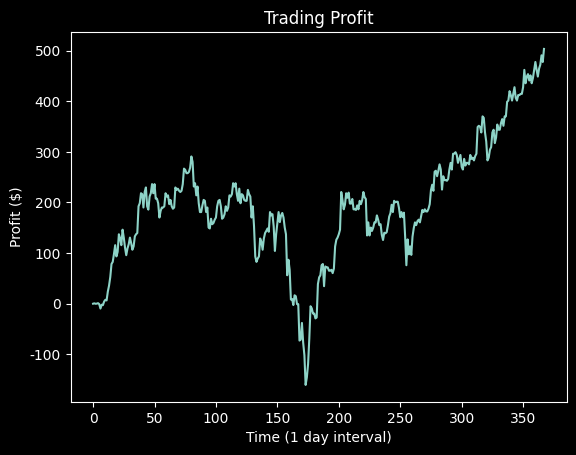

In [ ]:
# policy
def pi_hold(s, greedy=False, eps=0.2):
    return A[-1] # Buy at very beginning, hold till the end
final_profit = interact_test(pi_hold, series_name='train', verbose=True)
final_profit = interact_test(pi_hold, series_name='test', verbose=True)

In [ ]:
class Qsa(nn.Module):
    def __init__(self, input_size=7, num_classes=len(A)):
        super().__init__()
        self.fc_liner = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
#             nn.Linear(32, 16),
#             nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.fc_liner(x)

class StatesDataset(Dataset):
    def __init__(self, states, rewards, actions):
        self.states = torch.Tensor(states[:-1]).float()
        self.states_next = torch.Tensor(states[1:]).float()
        self.rewards = torch.Tensor(rewards).float()
        self.actions = actions

    def __len__(self):
        return len(self.states)

    def __getitem__(self, idx):
        return {
            'states': self.states[idx],
            'states_next': self.states_next[idx],
            'rewards': self.rewards[idx],
            'actions': self.actions[idx]
        }

def deep_sarsa(qsa, 
               series, 
               state_init, 
               pi, 
               optimizer,
               loss_func,
               epochs=10,
               episode=100, 
               gamma=0.9,
               lr=0.7,
               eps=0.5,
               min_eps=0.05,
               decay=0.9,
               greedy=False,
               verbose=True
              ):
    """
    Deep SARSA: On-policy TD control algorithm
    Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
    where a' is the actual action chosen by the policy at state s'
    """
    losses = list()
    learning_curve = list()
    
    # Loop for each episode
    for epi in tqdm(range(episode), desc="Training Deep SARSA"):
        # Decay epsilon for exploration
        eps *= decay
        
        # Generate a trajectory using current policy
        states, rewards, actions = simulate(series, state_init, pi, greedy, eps=max(min_eps, eps))
        
        # Form dataset and data loader
        dataset = StatesDataset(states, rewards, actions)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=False)
        
        # Train the neural network
        for epo in range(epochs):
            for data_pack in dataloader:
                # Current Q(s,a)
                input_tensor = data_pack['states']
                out = qsa(input_tensor)
                
                # Convert actions to list if it's a tensor
                actions_list = data_pack['actions'].tolist() if torch.is_tensor(data_pack['actions']) else list(data_pack['actions'])
                current_q = out[[i for i in range(len(data_pack['rewards']))], 
                               [a+k for a in actions_list]]

                # Target: r + γQ(s',a') where a' is next action actually taken
                with torch.no_grad():
                    next_q_values = qsa(data_pack['states_next'])
                    
                    # SARSA: Use Q-value of the next action actually taken
                    # For the last state, use the last action as there's no next action
                    actions_list = data_pack['actions'].tolist() if torch.is_tensor(data_pack['actions']) else list(data_pack['actions'])
                    next_actions = actions_list[1:] + [actions_list[-1]]
                    next_action_indices = [a+k for a in next_actions]
                    
                    next_q = next_q_values[[i for i in range(len(next_action_indices))], 
                                          next_action_indices]
                    
                    # SARSA update target
                    target_q = data_pack['rewards'] + gamma * next_q
                    
                # Smooth update: mix old Q with new target
                target_tensor = (1 - lr) * current_q + lr * target_q

                # Compute loss and update weights
                loss = loss_func(current_q, target_tensor)
                qsa.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.detach().item())
        
        # Evaluate on test set after each episode
        learning_curve.append(interact_test(pi, series_name='test', verbose=False))
    
    # Plot training results
    if verbose:
        print(f"Final loss: {losses[-1]:.6f}")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss curve
        ax1.plot(losses, linewidth=1, alpha=0.7)
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('Deep SARSA Training Loss')
        ax1.grid(alpha=0.3)
        
        # Plot learning curve
        ax2.plot(learning_curve, linewidth=2, marker='o', markersize=4)
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Profit ($)')
        ax2.set_title('Deep SARSA Learning Curve (Test Set)')
        ax2.grid(alpha=0.3)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig('deep_sarsa_training.pdf')
        plt.show()
        
    return learning_curve

In [ ]:

def train_deep_sarsa(verbose=False):
    """
    Train a Deep SARSA agent for stock trading
    
    Returns:
        pi_deep: Trained policy function
        qsa: Trained Q-network
        learning_curve: Profit on test set per episode
    """
    # Initialize Q-network
    qsa = Qsa(input_size=7, num_classes=len(A))
    
    # Initial state from first training sample
    first_row = train_series.iloc[0]
    # State: [price, balance, shares, macd, rsi, cci, adx]
    # Columns: date(0), open(1), high(2), low(3), close(4), volume(5), symbol(6), macd(7), rsi(8), cci(9), adx(10)
    state_init = [
        float(first_row['close']), 
        balance_init, 
        0,
        float(first_row['macd']),
        float(first_row['rsi']),
        float(first_row['cci']),
        float(first_row['adx'])
    ]
    series = train_series[1:].reset_index(drop=True)

    # Optimizer
    optimizer = optim.Adam(
        qsa.parameters(),
        lr=1e-5  # Learning rate for neural network
    )
    
    # Loss function
    loss_func = nn.HuberLoss()

    # Define epsilon-greedy policy based on Q-network
    def pi_deep(s, eps=0.2, greedy=False):
        """
        Policy that selects actions based on Q-values
        
        Args:
            s: Current state
            eps: Exploration rate
            greedy: If True, always select best action
        """
        with torch.no_grad():
            out_qsa = qsa(torch.Tensor(s).float()).squeeze()
            action = out_qsa.argmax().item() - k  # Best action

            if not greedy:
                r = np.random.rand()
                # Epsilon-greedy exploration
                if r < eps:
                    action = np.random.choice(A)
        return action

    # Train using Deep SARSA algorithm
    print("="*80)
    print("TRAINING DEEP SARSA AGENT")
    print("="*80)
    print(f"Network: {qsa}")
    print(f"\nHyperparameters:")
    print(f"  • Episodes: 30")
    print(f"  • Epochs per episode: 10")
    print(f"  • Discount factor (γ): 0.6")
    print(f"  • Learning rate (α): 0.7")
    print(f"  • Initial ε: 0.8")
    print(f"  • Min ε: 0.2")
    print(f"  • ε decay: 0.9")
    print("-"*80)
    
    learning_curve = deep_sarsa(
        qsa,
        series,
        state_init,
        pi_deep,
        optimizer,
        loss_func,
        epochs=10,      # Number of epochs for training NN in each episode
        episode=30,     # Number of episodes
        gamma=0.6,      # Discount coefficient
        lr=0.7,         # Learning rate for Q-function update
        eps=0.8,        # Initial epsilon for ε-greedy policy
        min_eps=0.2,    # Minimum epsilon
        decay=0.9,      # Epsilon decay rate
        greedy=False,
        verbose=verbose
    )
    
    print("\n" + "="*80)
    print("TRAINING COMPLETED!")
    print("="*80)
    
    return pi_deep, qsa, learning_curve

In [ ]:
# ============================================================
# TRAIN DEEP SARSA AGENT - 20 RUNS FOR STABILITY EVALUATION
# ============================================================
print("\n" + "🚀 "*20)
print("DEEP SARSA FOR STOCK TRADING - 20 RUNS")
print("🚀 "*20 + "\n")

# Run training 20 times to evaluate stability
all_final_profits = []
all_learning_curves = []

for run in tqdm(range(20), desc="Running Deep SARSA 20 times"):
    # Train the agent
    pi_deep, qsa, learning_curve = train_deep_sarsa(verbose=False)
    
    # Evaluate on test set
    final_profit = interact_test(pi_deep, series_name='test', verbose=False)
    
    all_final_profits.append(final_profit)
    all_learning_curves.append(learning_curve)

# Calculate averages and standard deviations
final_profit = np.mean(all_final_profits)
learning_curve = np.mean(all_learning_curves, axis=0)
std_final_profit = np.std(all_final_profits)
std_learning_curve = np.std(all_learning_curves, axis=0)

print(f"\n📊 Results over 20 runs:")
print(f"  • Average Final Profit: ${final_profit:.2f} ± ${std_final_profit:.2f}")
print(f"  • Average Best Training Profit: ${np.mean([max(lc) for lc in all_learning_curves]):.2f}")
print(f"  • Average Training Profit Std: ${np.mean(std_learning_curve):.2f}")

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*80)
print("DEEP SARSA TRAINING SUMMARY (AVERAGE OVER 20 RUNS)")
print("="*80)
print(f"\n📈 Learning Curve Statistics (averaged):")
print(f"  • Best profit during training:  ${max(learning_curve):.2f}")
print(f"  • Worst profit during training: ${min(learning_curve):.2f}")
print(f"  • Average profit:               ${np.mean(learning_curve):.2f}")
print(f"  • Std deviation:                ${np.std(learning_curve):.2f}")
print(f"  • Final test profit:            ${final_profit:.2f} ± ${std_final_profit:.2f}")
print(f"  • Stability (lower std better): ${std_final_profit:.2f}")

print("\n✅ DEEP SARSA TRAINING AND EVALUATION COMPLETED!")


🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 
DEEP SARSA FOR STOCK TRADING - 20 RUNS
🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 



Running Deep SARSA 20 times:   0%|          | 0/20 [00:00<?, ?it/s]

TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:   5%|▌         | 1/20 [00:23<07:18, 23.10s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  10%|█         | 2/20 [00:45<06:48, 22.70s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  15%|█▌        | 3/20 [01:08<06:25, 22.71s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  20%|██        | 4/20 [01:31<06:05, 22.86s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  25%|██▌       | 5/20 [01:54<05:44, 22.93s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  30%|███       | 6/20 [02:18<05:25, 23.26s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  35%|███▌      | 7/20 [02:41<05:02, 23.30s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  40%|████      | 8/20 [03:09<04:56, 24.75s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  45%|████▌     | 9/20 [03:36<04:39, 25.38s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  50%|█████     | 10/20 [04:06<04:29, 26.95s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  55%|█████▌    | 11/20 [04:32<04:00, 26.70s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  60%|██████    | 12/20 [04:56<03:27, 25.88s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  65%|██████▌   | 13/20 [05:20<02:56, 25.28s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  70%|███████   | 14/20 [05:44<02:29, 24.84s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  75%|███████▌  | 15/20 [06:08<02:02, 24.43s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  80%|████████  | 16/20 [06:32<01:37, 24.28s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  85%|████████▌ | 17/20 [06:55<01:12, 24.01s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  90%|█████████ | 18/20 [07:19<00:48, 24.10s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times:  95%|█████████▌| 19/20 [07:43<00:24, 24.00s/it]


TRAINING COMPLETED!
TRAINING DEEP SARSA AGENT
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Learning rate (α): 0.7
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Deep SARSA 20 times: 100%|██████████| 20/20 [08:07<00:00, 24.38s/it]


TRAINING COMPLETED!

📊 Results over 20 runs:
  • Average Final Profit: $215.12 ± $167.58
  • Average Best Training Profit: $310.58
  • Average Training Profit Std: $184.97

DEEP SARSA TRAINING SUMMARY (AVERAGE OVER 20 RUNS)

📈 Learning Curve Statistics (averaged):
  • Best profit during training:  $222.61
  • Worst profit during training: $155.16
  • Average profit:               $186.27
  • Std deviation:                $20.45
  • Final test profit:            $215.12 ± $167.58
  • Stability (lower std better): $167.58

✅ DEEP SARSA TRAINING AND EVALUATION COMPLETED!


# Deep Q-Learning (DQN) Implementation

## Algorithm Overview
Deep Q-Learning extends Q-learning by using:
1. **Experience Replay**: Store transitions and sample randomly to break correlation
2. **Target Network**: Separate network for computing targets, updated periodically
3. **Q-Learning Update**: $Q(s,a) \leftarrow Q(s,a) + \alpha[r + \gamma \max_{a'} Q(s',a') - Q(s,a)]$

This is an **off-policy** algorithm that learns the optimal policy while following an ε-greedy exploration policy.

In [ ]:
import collections
import random

class ReplayBuffer:
    """
    Experience Replay Buffer for DQN
    Stores transitions and samples random batches for training
    """
    def __init__(self, capacity=10000):
        self.buffer = collections.deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        """Store a transition"""
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        """Sample a random batch of transitions"""
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (
            torch.FloatTensor(np.array(states)),
            torch.LongTensor(actions),
            torch.FloatTensor(rewards),
            torch.FloatTensor(np.array(next_states)),
            torch.FloatTensor(dones)
        )
    
    def __len__(self):
        return len(self.buffer)


def deep_q_learning(q_network,
                    target_network,
                    series,
                    state_init,
                    pi,
                    optimizer,
                    loss_func,
                    replay_buffer,
                    episode=30,
                    gamma=0.6,
                    eps=0.8,
                    min_eps=0.2,
                    decay=0.9,
                    batch_size=128,
                    target_update=10,
                    greedy=False,
                    verbose=True):
    """
    Deep Q-Learning (DQN) with Experience Replay and Target Network
    
    Q(s,a) ← Q(s,a) + α[r + γ max_a' Q_target(s',a') - Q(s,a)]
    
    Args:
        q_network: Main Q-network for selecting actions
        target_network: Target Q-network for computing TD targets
        series: Training data series
        state_init: Initial state
        pi: Policy function
        optimizer: Neural network optimizer
        loss_func: Loss function
        replay_buffer: Experience replay buffer
        episode: Number of training episodes
        gamma: Discount factor
        eps: Initial exploration rate
        min_eps: Minimum exploration rate
        decay: Epsilon decay rate
        batch_size: Mini-batch size for training
        target_update: Frequency (in episodes) to update target network
        greedy: Whether to use greedy policy
        verbose: Print training progress
    
    Returns:
        learning_curve: List of profits on test set per episode
    """
    losses = []
    learning_curve = []
    
    # Copy weights to target network initially
    target_network.load_state_dict(q_network.state_dict())
    
    for epi in tqdm(range(episode), desc="Training DQN"):
        # Decay epsilon
        eps *= decay
        current_eps = max(min_eps, eps)
        
        # Collect trajectory and store in replay buffer
        states, rewards, actions = simulate(series, state_init, pi, greedy, eps=current_eps)
        
        # Add experiences to replay buffer
        for i in range(len(states) - 1):
            done = 1.0 if i == len(states) - 2 else 0.0
            replay_buffer.push(states[i], actions[i], rewards[i], states[i+1], done)
        
        # Training step - sample from replay buffer
        if len(replay_buffer) >= batch_size:
            for _ in range(10):  # Multiple updates per episode
                # Sample mini-batch
                state_batch, action_batch, reward_batch, next_state_batch, done_batch = replay_buffer.sample(batch_size)
                
                # Current Q-values: Q(s,a)
                current_q_values = q_network(state_batch)
                action_indices = (action_batch + k).long()
                current_q = current_q_values.gather(1, action_indices.unsqueeze(1)).squeeze(1)
                
                # Target Q-values: r + γ max_a' Q_target(s',a')
                with torch.no_grad():
                    next_q_values = target_network(next_state_batch)
                    max_next_q = next_q_values.max(1)[0]
                    target_q = reward_batch + gamma * max_next_q * (1 - done_batch)
                
                # Compute loss and update
                loss = loss_func(current_q, target_q)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        
        # Update target network periodically
        if (epi + 1) % target_update == 0:
            target_network.load_state_dict(q_network.state_dict())
        
        # Evaluate on test set
        learning_curve.append(interact_test(pi, series_name='test', verbose=False))
    
    # Plot results
    if verbose:
        print(f"Final loss: {losses[-1]:.6f}")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Loss curve
        ax1.plot(losses, linewidth=1, alpha=0.7)
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('DQN Training Loss')
        ax1.grid(alpha=0.3)
        
        # Learning curve
        ax2.plot(learning_curve, linewidth=2, marker='o', markersize=4)
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Profit ($)')
        ax2.set_title('DQN Learning Curve (Test Set)')
        ax2.grid(alpha=0.3)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig('dqn_training.pdf')
        plt.show()
    
    return learning_curve

In [ ]:
def train_dqn(verbose=False):
    """
    Train a Deep Q-Network (DQN) agent for stock trading
    
    Returns:
        pi_dqn: Trained policy function
        q_network: Trained Q-network
        learning_curve: Profit on test set per episode
    """
    # Initialize Q-network and target network
    q_network = Qsa(input_size=7, num_classes=len(A))
    target_network = Qsa(input_size=7, num_classes=len(A))
    target_network.load_state_dict(q_network.state_dict())
    
    # Initialize replay buffer
    replay_buffer = ReplayBuffer(capacity=10000)
    
    # Initial state
    first_row = train_series.iloc[0]
    state_init = [
        float(first_row['close']), 
        balance_init, 
        0,
        float(first_row['macd']),
        float(first_row['rsi']),
        float(first_row['cci']),
        float(first_row['adx'])
    ]
    series = train_series[1:].reset_index(drop=True)
    
    # Optimizer
    optimizer = optim.Adam(q_network.parameters(), lr=1e-4)
    loss_func = nn.MSELoss()
    
    # Define epsilon-greedy policy based on Q-network
    def pi_dqn(s, eps=0.2, greedy=False):
        """DQN policy - epsilon-greedy based on Q-values"""
        with torch.no_grad():
            out_qsa = q_network(torch.Tensor(s).float()).squeeze()
            action = out_qsa.argmax().item() - k
            
            if not greedy and np.random.rand() < eps:
                action = np.random.choice(A)
        return action
    
    # Train using DQN
    print("="*80)
    print("TRAINING DEEP Q-NETWORK (DQN)")
    print("="*80)
    print(f"Network: {q_network}")
    print(f"\nHyperparameters:")
    print(f"  • Episodes: 30")
    print(f"  • Discount factor (γ): 0.6")
    print(f"  • Initial ε: 0.8")
    print(f"  • Min ε: 0.2")
    print(f"  • ε decay: 0.9")
    print(f"  • Batch size: 128")
    print(f"  • Replay buffer capacity: 10000")
    print(f"  • Target update frequency: 10 episodes")
    print("-"*80)
    
    learning_curve = deep_q_learning(
        q_network=q_network,
        target_network=target_network,
        series=series,
        state_init=state_init,
        pi=pi_dqn,
        optimizer=optimizer,
        loss_func=loss_func,
        replay_buffer=replay_buffer,
        episode=30,
        gamma=0.6,
        eps=0.8,
        min_eps=0.2,
        decay=0.9,
        batch_size=128,
        target_update=10,
        greedy=False,
        verbose=verbose
    )
    
    print("\n" + "="*80)
    print("DQN TRAINING COMPLETED!")
    print("="*80)
    
    return pi_dqn, q_network, learning_curve

In [ ]:
# ============================================================
# TRAIN DQN AGENT - 20 RUNS FOR STABILITY EVALUATION
# ============================================================
print("\n" + "🎯 "*20)
print("DEEP Q-NETWORK (DQN) FOR STOCK TRADING - 20 RUNS")
print("🎯 "*20 + "\n")

# Run training 20 times to evaluate stability
all_final_profits_dqn = []
all_learning_curves_dqn = []

for run in tqdm(range(20), desc="Running DQN 20 times"):
    # Train the DQN agent
    pi_dqn, q_network_dqn, learning_curve_dqn_run = train_dqn(verbose=False)
    
    # Evaluate on test set
    final_profit_dqn_run = interact_test(pi_dqn, series_name='test', verbose=False)
    
    all_final_profits_dqn.append(final_profit_dqn_run)
    all_learning_curves_dqn.append(learning_curve_dqn_run)

# Calculate averages and standard deviations
final_profit_dqn = np.mean(all_final_profits_dqn)
learning_curve_dqn = np.mean(all_learning_curves_dqn, axis=0)
std_final_profit_dqn = np.std(all_final_profits_dqn)
std_learning_curve_dqn = np.std(all_learning_curves_dqn, axis=0)

print(f"\n📊 Results over 20 runs:")
print(f"  • Average Final Profit: ${final_profit_dqn:.2f} ± ${std_final_profit_dqn:.2f}")
print(f"  • Average Best Training Profit: ${np.mean([max(lc) for lc in all_learning_curves_dqn]):.2f}")
print(f"  • Average Training Profit Std: ${np.mean(std_learning_curve_dqn):.2f}")

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*80)
print("DQN TRAINING SUMMARY (AVERAGE OVER 20 RUNS)")
print("="*80)
print(f"\n📈 Learning Curve Statistics (averaged):")
print(f"  • Best profit during training:  ${max(learning_curve_dqn):.2f}")
print(f"  • Worst profit during training: ${min(learning_curve_dqn):.2f}")
print(f"  • Average profit:               ${np.mean(learning_curve_dqn):.2f}")
print(f"  • Std deviation:                ${np.std(learning_curve_dqn):.2f}")
print(f"  • Final test profit:            ${final_profit_dqn:.2f} ± ${std_final_profit_dqn:.2f}")
print(f"  • Stability (lower std better): ${std_final_profit_dqn:.2f}")

print("\n✅ DQN TRAINING AND EVALUATION COMPLETED!")


🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 
DEEP Q-NETWORK (DQN) FOR STOCK TRADING - 20 RUNS
🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 🎯 



Running DQN 20 times:   0%|          | 0/20 [00:00<?, ?it/s]

TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Training DQN:   0%|          | 0/30 [00:00<?, ?it/s]

Running DQN 20 times:   5%|▌         | 1/20 [00:15<04:50, 15.30s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  10%|█         | 2/20 [00:29<04:24, 14.71s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  15%|█▌        | 3/20 [00:44<04:08, 14.64s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  20%|██        | 4/20 [00:58<03:54, 14.63s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  25%|██▌       | 5/20 [01:13<03:42, 14.82s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  30%|███       | 6/20 [01:28<03:25, 14.67s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  35%|███▌      | 7/20 [01:43<03:13, 14.88s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  40%|████      | 8/20 [01:58<02:56, 14.74s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  45%|████▌     | 9/20 [02:12<02:42, 14.78s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  50%|█████     | 10/20 [02:27<02:27, 14.72s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  55%|█████▌    | 11/20 [02:42<02:13, 14.79s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  60%|██████    | 12/20 [02:57<01:58, 14.80s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  65%|██████▌   | 13/20 [03:12<01:44, 14.90s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  70%|███████   | 14/20 [03:27<01:29, 14.90s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Training DQN: 100%|██████████| 30/30 [00:14<00:00,  2.10it/s]




DQN TRAINING COMPLETED!


Running DQN 20 times:  75%|███████▌  | 15/20 [03:41<01:14, 14.81s/it]

TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  80%|████████  | 16/20 [03:56<00:58, 14.74s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  85%|████████▌ | 17/20 [04:11<00:44, 14.78s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  90%|█████████ | 18/20 [04:25<00:29, 14.74s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times:  95%|█████████▌| 19/20 [04:41<00:14, 14.86s/it]


DQN TRAINING COMPLETED!
TRAINING DEEP Q-NETWORK (DQN)
Network: Qsa(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=11, bias=True)
  )
)

Hyperparameters:
  • Episodes: 30
  • Discount factor (γ): 0.6
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
  • Batch size: 128
  • Replay buffer capacity: 10000
  • Target update frequency: 10 episodes
--------------------------------------------------------------------------------


Running DQN 20 times: 100%|██████████| 20/20 [04:55<00:00, 14.79s/it]


DQN TRAINING COMPLETED!

📊 Results over 20 runs:
  • Average Final Profit: $295.54 ± $146.93
  • Average Best Training Profit: $386.57
  • Average Training Profit Std: $173.70

DQN TRAINING SUMMARY (AVERAGE OVER 20 RUNS)

📈 Learning Curve Statistics (averaged):
  • Best profit during training:  $309.12
  • Worst profit during training: $263.95
  • Average profit:               $283.79
  • Std deviation:                $13.08
  • Final test profit:            $295.54 ± $146.93
  • Stability (lower std better): $146.93

✅ DQN TRAINING AND EVALUATION COMPLETED!


# Policy Gradient Method 

In [ ]:
# ============================================================
# POLICY GRADIENT (REINFORCE) IMPLEMENTATION
# ============================================================

class PolicyNetwork(nn.Module):
    """
    Policy Network π_θ(a|s) for REINFORCE algorithm
    Outputs probability distribution over actions using Softmax
    """
    def __init__(self, input_size=7, num_classes=len(A), hidden_size=20):
        super().__init__()
        self.fc_liner = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
            nn.Softmax(dim=-1)  # Output action probabilities
        )
    
    def forward(self, x):
        """
        Forward pass through policy network
        Args:
            x: State tensor [batch_size, input_size]
        Returns:
            Action probabilities [batch_size, num_classes]
        """
        return self.fc_liner(x)


def simulate_pg(series, state_init, pi, greedy, eps=0.2):
    """
    Simulate a trajectory using the policy
    Returns normalized states, rewards, and actions
    """
    Rs = []
    actions = []
    state_init_norm = np.array(state_init)
    state_init_norm = (state_init_norm - min(state_init_norm)) / (max(state_init_norm) - min(state_init_norm))
    states = [state_init]
    states_normed = [list(state_init_norm)]

    for index, row in series.iterrows():
        # Select action using policy
        a = pi(states_normed[-1], greedy=greedy, eps=eps)
        actions.append(a)
        
        # Update state
        s = update_state(states[-1], a, row)
        states.append(s)
        
        # Normalize state
        state = np.array(s)
        state_norm = (state - min(state)) / (max(state) - min(state))
        states_normed.append(list(state_norm))
        
        # Compute reward
        Rs.append(reward(states[-2], states[-1]))
    
    return states_normed, Rs, actions


def policy_gradient_learning(rpg,
                              series,
                              state_init,
                              pi,
                              optimizer,
                              epochs=10,
                              episode=30,
                              gamma=0.6,
                              eps=0.8,
                              min_eps=0.2,
                              decay=0.9,
                              greedy=False,
                              verbose=True):
    """
    REINFORCE Policy Gradient Algorithm
    
    Algorithm:
    1. Sample trajectory τ = (s_0, a_0, r_0, ..., s_T) using π_θ
    2. For each time step t:
        - Compute return: G_t = Σ_{k=t}^T γ^(k-t) * r_k
        - Compute gradient: ∇_θ J(θ) ≈ Σ_t ∇_θ log π_θ(a_t|s_t) * G_t
    3. Update policy: θ ← θ + α * ∇_θ J(θ)
    
    Args:
        rpg: Policy network π_θ(a|s)
        series: Training data series
        state_init: Initial state
        pi: Policy function for action selection
        optimizer: Neural network optimizer
        epochs: Number of gradient updates per episode
        episode: Number of episodes
        gamma: Discount factor for returns
        eps: Initial exploration rate
        min_eps: Minimum exploration rate
        decay: Epsilon decay rate
        greedy: Whether to use greedy policy
        verbose: Print training progress
    
    Returns:
        losses: List of training losses
        profits_lc: List of profits on training set per episode
    """
    losses = []
    profits_lc = []
    
    # Policy for random exploration in first episode
    def pi_random(s, greedy=False, eps=0.2):
        return np.random.choice(A)
    
    # Loop for each episode
    for epi in tqdm(range(episode), desc="Training REINFORCE"):
        # Decay epsilon for exploration
        eps *= decay
        
        # Generate a trajectory using current policy
        if epi == 0:
            # First episode: random exploration
            states, rewards, actions = simulate_pg(series, state_init, pi_random, greedy, eps=max(min_eps, eps))
        else:
            # Subsequent episodes: use learned policy
            states, rewards, actions = simulate_pg(series, state_init, pi, greedy, eps=max(min_eps, eps))
        
        # Create dataset from trajectory
        dataset = StatesDataset(states, rewards, actions)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=False)
        
        # Training loop: multiple epochs on the same trajectory
        for epo in range(epochs):
            for data_pack in dataloader:
                # Get states and actions from batch
                input_tensor = data_pack['states']
                action_tensor = (data_pack['actions'] + k).long()
                
                # Forward pass: get action probabilities
                action_probs = rpg(input_tensor)
                
                # Compute log probabilities: log π_θ(a_t|s_t)
                log_probs = torch.log(action_probs + 1e-10)  # Add small epsilon for numerical stability
                
                # Calculate discounted returns G_t at each time step t
                # G_t = r_t + γ*r_{t+1} + γ²*r_{t+2} + ... + γ^(T-t)*r_T
                batch_reward = data_pack['rewards']
                discount_rewards = np.array([gamma ** i * batch_reward[i] for i in range(len(batch_reward))])
                
                # Compute cumulative sum in reverse to get G_t for each t
                discount_rewards = discount_rewards[::-1].cumsum()[::-1]
                discount_rewards = torch.Tensor(discount_rewards.copy())
                
                # Normalize returns for stable training (optional but recommended)
                # discount_rewards = (discount_rewards - discount_rewards.mean()) / (discount_rewards.std() + 1e-8)
                
                # Select log probabilities of taken actions: log π_θ(a_t|s_t)
                action_tensor_expanded = torch.unsqueeze(action_tensor, 1)
                selected_logprobs = torch.gather(log_probs, 1, action_tensor_expanded).squeeze()
                
                # Policy gradient loss: -Σ_t [log π_θ(a_t|s_t) * G_t]
                # Negative because we want gradient ascent (maximize J)
                # But optimizer does gradient descent, so we minimize -J
                loss = -(selected_logprobs * discount_rewards).mean()
                
                # Backpropagation and parameter update
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                losses.append(loss.detach().item())
        
        # Evaluate on training set after each episode
        profits_lc.append(interact_test(pi, series_name='train', verbose=False))
    
    # Visualization
    if verbose:
        print(f"Final loss: {losses[-1]:.6f}")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss curve
        ax1.plot(losses, linewidth=1, alpha=0.7)
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('Policy Gradient Training Loss')
        ax1.grid(alpha=0.3)
        
        # Plot learning curve (profits)
        ax2.plot(profits_lc, linewidth=2, marker='o', markersize=4)
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Profit ($)')
        ax2.set_title('Policy Gradient Learning Curve (Train Set)')
        ax2.grid(alpha=0.3)
        ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig('policy_gradient_training.pdf')
        plt.show()
    
    return losses, profits_lc

In [ ]:
def train_policy_gradient(verbose=False):
    """
    Train a Policy Gradient (REINFORCE) agent for stock trading
    
    Returns:
        pi_gradient: Trained policy function
        rpg: Trained policy network
        profits_lc: Profit on training set per episode
    """
    # Initialize Policy Network
    rpg = PolicyNetwork(input_size=7, num_classes=len(A), hidden_size=20)
    
    # Initial state from first training sample
    first_row = train_series.iloc[0]
    state_init = [
        float(first_row['close']), 
        balance_init, 
        0,
        float(first_row['macd']),
        float(first_row['rsi']),
        float(first_row['cci']),
        float(first_row['adx'])
    ]
    series = train_series[1:].reset_index(drop=True)
    
    # Optimizer - using SGD as in original implementation
    optimizer = optim.SGD(rpg.parameters(), lr=1e-4)
    
    # Define epsilon-greedy policy based on policy network
    def pi_gradient(s, eps=0.2, greedy=False):
        """
        Policy that selects actions based on probability distribution from policy network
        
        Args:
            s: Current state (normalized)
            eps: Exploration rate
            greedy: If True, always select best action
        """
        with torch.no_grad():
            out_rpg = rpg(torch.Tensor(s).float()).squeeze()
            action = out_rpg.argmax().item() - k  # Best action (greedy)
            
            if not greedy:
                r = np.random.rand()
                # Epsilon-greedy exploration
                # With probability eps, choose a different action
                if r > 1 - eps + (eps / len(A)):
                    a_ = np.random.choice(A)
                    while a_ == action:
                        a_ = np.random.choice(A)
                    action = a_
        
        return action
    
    # Train using Policy Gradient (REINFORCE)
    print("="*80)
    print("TRAINING POLICY GRADIENT (REINFORCE)")
    print("="*80)
    print(f"Network: {rpg}")
    print(f"\nHyperparameters:")
    print(f"  • Episodes: 30")
    print(f"  • Epochs per episode: 10")
    print(f"  • Discount factor (γ): 0.6")
    print(f"  • Optimizer: SGD with lr=1e-4")
    print(f"  • Initial ε: 0.8")
    print(f"  • Min ε: 0.2")
    print(f"  • ε decay: 0.9")
    print("-"*80)
    
    losses, profits_lc = policy_gradient_learning(
        rpg=rpg,
        series=series,
        state_init=state_init,
        pi=pi_gradient,
        optimizer=optimizer,
        epochs=10,      # Number of epochs for training NN in each episode
        episode=30,     # Number of episodes
        gamma=0.6,      # Discount coefficient
        eps=0.8,        # Initial epsilon for ε-greedy policy
        min_eps=0.2,    # Minimum epsilon
        decay=0.9,      # Epsilon decay rate
        greedy=False,
        verbose=verbose
    )
    
    print("\n" + "="*80)
    print("POLICY GRADIENT TRAINING COMPLETED!")
    print("="*80)
    
    return pi_gradient, rpg, profits_lc

In [ ]:
# ============================================================
# TRAIN POLICY GRADIENT AGENT - 20 RUNS FOR STABILITY EVALUATION
# ============================================================

print("POLICY GRADIENT (REINFORCE) FOR STOCK TRADING - 20 RUNS")

# Run training 20 times to evaluate stability
all_final_profits_pg = []
all_learning_curves_pg = []

for run in tqdm(range(20), desc="Running Policy Gradient 20 times"):
    # Train the Policy Gradient agent
    pi_gradient, rpg, profits_lc_pg_run = train_policy_gradient(verbose=False)
    
    # Evaluate on test set
    final_profit_pg_run = interact_test(pi_gradient, series_name='test', verbose=False)
    
    all_final_profits_pg.append(final_profit_pg_run)
    all_learning_curves_pg.append(profits_lc_pg_run)

# Calculate averages and standard deviations
final_profit_pg = np.mean(all_final_profits_pg)
profits_lc_pg = np.mean(all_learning_curves_pg, axis=0)
std_final_profit_pg = np.std(all_final_profits_pg)
std_learning_curve_pg = np.std(all_learning_curves_pg, axis=0)

print(f"\n📊 Results over 20 runs:")
print(f"  • Average Final Profit: ${final_profit_pg:.2f} ± ${std_final_profit_pg:.2f}")
print(f"  • Average Best Training Profit: ${np.mean([max(lc) for lc in all_learning_curves_pg]):.2f}")
print(f"  • Average Training Profit Std: ${np.mean(std_learning_curve_pg):.2f}")

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*80)
print("POLICY GRADIENT TRAINING SUMMARY (AVERAGE OVER 20 RUNS)")
print("="*80)
print(f"\n📈 Learning Curve Statistics (on Training Set, averaged):")
print(f"  • Best profit during training:  ${max(profits_lc_pg):.2f}")
print(f"  • Worst profit during training: ${min(profits_lc_pg):.2f}")
print(f"  • Average profit:               ${np.mean(profits_lc_pg):.2f}")
print(f"  • Std deviation:                ${np.std(profits_lc_pg):.2f}")
print(f"  • Final test profit:            ${final_profit_pg:.2f} ± ${std_final_profit_pg:.2f}")
print(f"  • Stability (lower std better): ${std_final_profit_pg:.2f}")

print("\n✅ POLICY GRADIENT TRAINING AND EVALUATION COMPLETED!")

POLICY GRADIENT (REINFORCE) FOR STOCK TRADING - 20 RUNS


Running Policy Gradient 20 times:   0%|          | 0/20 [00:00<?, ?it/s]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:   5%|▌         | 1/20 [00:41<13:11, 41.68s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:42<00:00,  1.42s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  10%|█         | 2/20 [01:24<12:43, 42.43s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:42<00:00,  1.41s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  15%|█▌        | 3/20 [02:07<12:01, 42.45s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  20%|██        | 4/20 [02:48<11:13, 42.07s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:41<00:00,  1.40s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  25%|██▌       | 5/20 [03:30<10:31, 42.11s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  30%|███       | 6/20 [04:14<09:55, 42.51s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:53<00:00,  1.80s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  35%|███▌      | 7/20 [05:08<10:02, 46.32s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  40%|████      | 8/20 [05:51<09:06, 45.51s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:42<00:00,  1.41s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  45%|████▌     | 9/20 [06:34<08:10, 44.58s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  50%|█████     | 10/20 [07:17<07:20, 44.01s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  55%|█████▌    | 11/20 [07:58<06:27, 43.08s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  60%|██████    | 12/20 [08:39<05:41, 42.65s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  65%|██████▌   | 13/20 [09:21<04:56, 42.36s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:41<00:00,  1.39s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  70%|███████   | 14/20 [10:03<04:13, 42.26s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:41<00:00,  1.39s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  75%|███████▌  | 15/20 [10:45<03:30, 42.15s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  80%|████████  | 16/20 [11:28<02:49, 42.50s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Running Policy Gradient 20 times:  85%|████████▌ | 17/20 [12:10<02:06, 42.12s/it]


POLICY GRADIENT TRAINING COMPLETED!
TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:41<00:00,  1.37s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  90%|█████████ | 18/20 [12:51<01:23, 41.91s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:41<00:00,  1.39s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times:  95%|█████████▌| 19/20 [13:33<00:41, 41.90s/it]

TRAINING POLICY GRADIENT (REINFORCE)
Network: PolicyNetwork(
  (fc_liner): Sequential(
    (0): Linear(in_features=7, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=11, bias=True)
    (3): Softmax(dim=-1)
  )
)

Hyperparameters:
  • Episodes: 30
  • Epochs per episode: 10
  • Discount factor (γ): 0.6
  • Optimizer: SGD with lr=1e-4
  • Initial ε: 0.8
  • Min ε: 0.2
  • ε decay: 0.9
--------------------------------------------------------------------------------


Training REINFORCE: 100%|██████████| 30/30 [00:42<00:00,  1.40s/it]




POLICY GRADIENT TRAINING COMPLETED!


Running Policy Gradient 20 times: 100%|██████████| 20/20 [14:15<00:00, 42.78s/it]


📊 Results over 20 runs:
  • Average Final Profit: $203.57 ± $199.35
  • Average Best Training Profit: $573.66
  • Average Training Profit Std: $577.51

POLICY GRADIENT TRAINING SUMMARY (AVERAGE OVER 20 RUNS)

📈 Learning Curve Statistics (on Training Set, averaged):
  • Best profit during training:  $563.77
  • Worst profit during training: $543.66
  • Average profit:               $553.15
  • Std deviation:                $5.12
  • Final test profit:            $203.57 ± $199.35
  • Stability (lower std better): $199.35

✅ POLICY GRADIENT TRAINING AND EVALUATION COMPLETED!


# Comprehensive Comparison: Deep SARSA vs DQN vs Policy Gradient

## Algorithm Comparison

| Algorithm | Type | Learning | Key Features |
|-----------|------|----------|--------------|
| **Deep SARSA** | Value-based | On-policy | Uses actual next action taken; more conservative |
| **Deep Q-Learning (DQN)** | Value-based | Off-policy | Experience replay; target network; learns optimal policy |
| **Policy Gradient (REINFORCE)** | Policy-based | On-policy | Directly optimizes policy; handles stochastic policies |

## Theoretical Differences

### Deep SARSA
- Update: $Q(s,a) \leftarrow Q(s,a) + \alpha[r + \gamma Q(s',a') - Q(s,a)]$ where $a'$ is actual next action
- Learns the value of the policy being followed
- More stable but potentially suboptimal

### DQN  
- Update: $Q(s,a) \leftarrow Q(s,a) + \alpha[r + \gamma \max_{a'} Q(s',a') - Q(s,a)]$
- Learns the optimal action-value function
- Experience replay breaks correlation; target network stabilizes training

### Policy Gradient (REINFORCE)
- Update: $\theta \leftarrow \theta + \alpha \nabla_\theta \log \pi_\theta(a|s) G_t$
- Directly optimizes the policy without value function
- Natural for stochastic policies; high variance but unbiased


PERFORMANCE COMPARISON: DEEP SARSA vs DQN vs POLICY GRADIENT
Results averaged over 20 runs for stability evaluation

       Algorithm Final Test Profit ($)  Avg Training Profit ($)  Best Training Profit ($)   ROI (%)
     Deep SARSA       215.12 ± 167.58               186.265952                222.610371 21.512394
            DQN       295.54 ± 146.93               283.788435                309.120129 29.554340
Policy Gradient       203.57 ± 199.35               553.150225                563.774326 20.356672


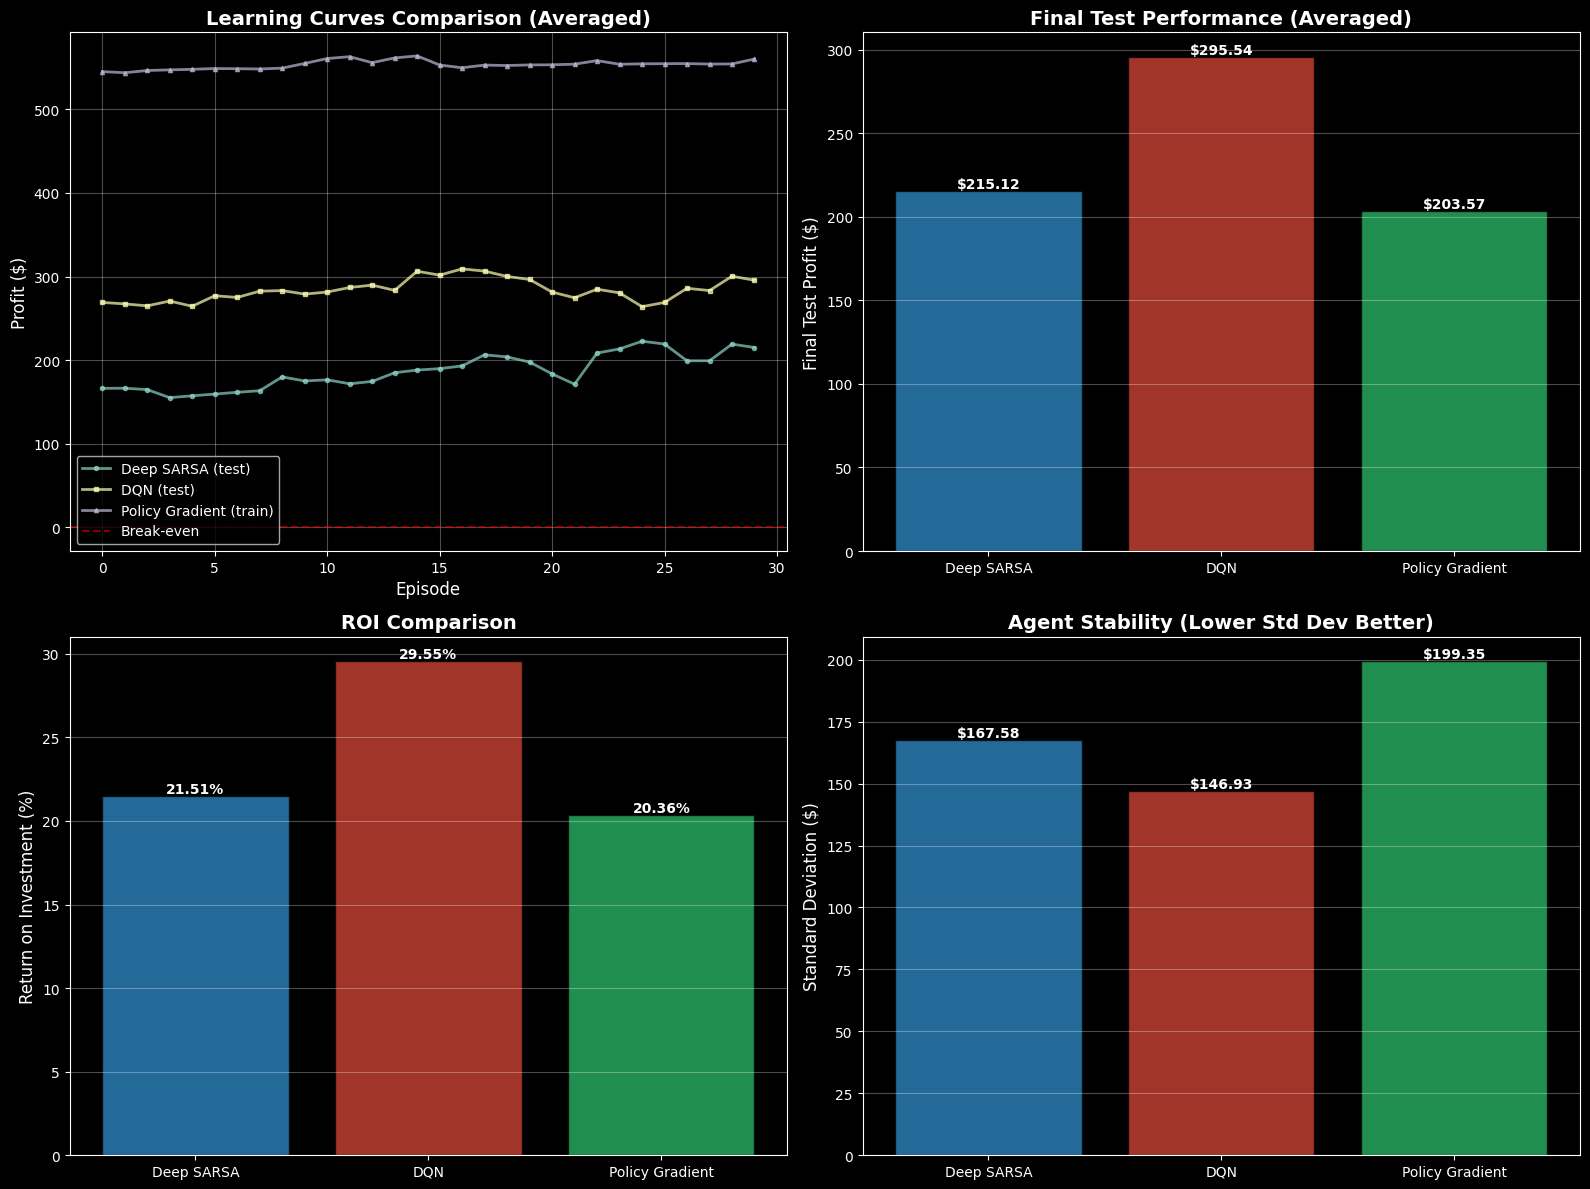


STATISTICAL SUMMARY (AVERAGED OVER 20 RUNS)

Deep SARSA:
  • Final test profit:      $215.12 ± $167.58
  • Average training profit: $186.27
  • Best training profit:    $222.61
  • Agent stability (std):   $167.58
  • Return on investment:    21.51%

DQN:
  • Final test profit:      $295.54 ± $146.93
  • Average training profit: $283.79
  • Best training profit:    $309.12
  • Agent stability (std):   $146.93
  • Return on investment:    29.55%

Policy Gradient:
  • Final test profit:      $203.57 ± $199.35
  • Average training profit: $553.15
  • Best training profit:    $563.77
  • Agent stability (std):   $199.35
  • Return on investment:    20.36%

🏆 BEST PERFORMING ALGORITHM: DQN
   Final Profit: $295.54 ± $146.93
   ROI: 29.55%


In [ ]:
# ============================================================
# COMPREHENSIVE COMPARISON OF ALL THREE ALGORITHMS
# ============================================================

print("\n" + "="*80)
print("PERFORMANCE COMPARISON: DEEP SARSA vs DQN vs POLICY GRADIENT")
print("Results averaged over 20 runs for stability evaluation")
print("="*80)

# Collect results
algorithms = ['Deep SARSA', 'DQN', 'Policy Gradient']
final_profits = [final_profit, final_profit_dqn, final_profit_pg]
avg_learning = [
    np.mean(learning_curve),
    np.mean(learning_curve_dqn),
    np.mean(profits_lc_pg)
]
best_learning = [
    max(learning_curve),
    max(learning_curve_dqn),
    max(profits_lc_pg)
]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Final Test Profit ($)': [f"{p:.2f} ± {s:.2f}" for p, s in zip(final_profits, [std_final_profit, std_final_profit_dqn, std_final_profit_pg])],
    'Avg Training Profit ($)': avg_learning,
    'Best Training Profit ($)': best_learning,
    'ROI (%)': [p/balance_init*100 for p in final_profits]
})

print("\n", comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Learning curves comparison
ax1 = axes[0, 0]
ax1.plot(learning_curve, label='Deep SARSA (test)', linewidth=2, marker='o', markersize=3, alpha=0.7)
ax1.plot(learning_curve_dqn, label='DQN (test)', linewidth=2, marker='s', markersize=3, alpha=0.7)
ax1.plot(profits_lc_pg, label='Policy Gradient (train)', linewidth=2, marker='^', markersize=3, alpha=0.7)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Profit ($)', fontsize=12)
ax1.set_title('Learning Curves Comparison (Averaged)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# 2. Final performance bar chart
ax2 = axes[0, 1]
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax2.bar(algorithms, final_profits, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_ylabel('Final Test Profit ($)', fontsize=12)
ax2.set_title('Final Test Performance (Averaged)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=10, fontweight='bold')

# 3. ROI comparison
ax3 = axes[1, 0]
roi_values = [p/balance_init*100 for p in final_profits]
bars = ax3.bar(algorithms, roi_values, color=colors, alpha=0.7, edgecolor='black')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.set_ylabel('Return on Investment (%)', fontsize=12)
ax3.set_title('ROI Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=10, fontweight='bold')

# 4. Agent stability (std deviation of final profits over 20 runs)
ax4 = axes[1, 1]
std_values = [std_final_profit, std_final_profit_dqn, std_final_profit_pg]
bars = ax4.bar(algorithms, std_values, color=colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Standard Deviation ($)', fontsize=12)
ax4.set_title('Agent Stability (Lower Std Dev Better)', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('algorithm_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary
print("\n" + "="*80)
print("STATISTICAL SUMMARY (AVERAGED OVER 20 RUNS)")
print("="*80)

for i, algo in enumerate(algorithms):
    print(f"\n{algo}:")
    print(f"  • Final test profit:      ${final_profits[i]:.2f} ± ${std_values[i]:.2f}")
    print(f"  • Average training profit: ${avg_learning[i]:.2f}")
    print(f"  • Best training profit:    ${best_learning[i]:.2f}")
    print(f"  • Agent stability (std):   ${std_values[i]:.2f}")
    print(f"  • Return on investment:    {roi_values[i]:.2f}%")

# Determine winner
best_algo_idx = np.argmax(final_profits)
print("\n" + "="*80)
print(f"🏆 BEST PERFORMING ALGORITHM: {algorithms[best_algo_idx]}")
print(f"   Final Profit: ${final_profits[best_algo_idx]:.2f} ± ${std_values[best_algo_idx]:.2f}")
print(f"   ROI: {roi_values[best_algo_idx]:.2f}%")
print("="*80)